In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [2]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
print(df.columns)

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')


In [5]:
# Checking for missing values
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

age
False    299
Name: age, dtype: int64

anaemia
False    299
Name: anaemia, dtype: int64

creatinine_phosphokinase
False    299
Name: creatinine_phosphokinase, dtype: int64

diabetes
False    299
Name: diabetes, dtype: int64

ejection_fraction
False    299
Name: ejection_fraction, dtype: int64

high_blood_pressure
False    299
Name: high_blood_pressure, dtype: int64

platelets
False    299
Name: platelets, dtype: int64

serum_creatinine
False    299
Name: serum_creatinine, dtype: int64

serum_sodium
False    299
Name: serum_sodium, dtype: int64

sex
False    299
Name: sex, dtype: int64

smoking
False    299
Name: smoking, dtype: int64

time
False    299
Name: time, dtype: int64

DEATH_EVENT
False    299
Name: DEATH_EVENT, dtype: int64



In [6]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [7]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [8]:
# Cloning the dataframe to be normalized
df_normalized = df.copy(deep=True)

In [9]:
# Normalizing data
df_normalized['age']=df['age']/df['age'].max()
df_normalized['creatinine_phosphokinase']=df['creatinine_phosphokinase']/df['creatinine_phosphokinase'].max()
df_normalized['ejection_fraction']=df['ejection_fraction']/df['ejection_fraction'].max()
df_normalized['platelets']=df['platelets']/df['platelets'].max()
df_normalized['serum_creatinine']=df['serum_creatinine']/df['serum_creatinine'].max()
df_normalized['serum_sodium']=df['serum_sodium']/df['serum_sodium'].max()
df_normalized['time']=df['time']/df['time'].max()

In [10]:
df_normalized.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,0.640357,0.431438,0.074016,0.418060,0.476045,0.351171,0.309833,0.148285,0.923145,0.648829,0.32107,0.457056,0.32107
std,0.125209,0.496107,0.123431,0.494067,0.147936,0.478136,0.115064,0.110054,0.029814,0.478136,0.46767,0.272331,0.46767
min,0.421053,0.000000,0.002926,0.000000,0.175000,0.000000,0.029529,0.053191,0.763514,0.000000,0.00000,0.014035,0.00000
25%,0.536842,0.000000,0.014820,0.000000,0.375000,0.000000,0.250000,0.095745,0.905405,0.000000,0.00000,0.256140,0.00000
50%,0.631579,0.000000,0.031803,0.000000,0.475000,0.000000,0.308235,0.117021,0.925676,1.000000,0.00000,0.403509,0.00000
75%,0.736842,1.000000,0.074036,1.000000,0.562500,1.000000,0.357059,0.148936,0.945946,1.000000,1.00000,0.712281,1.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000


In [11]:
df_normalized.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


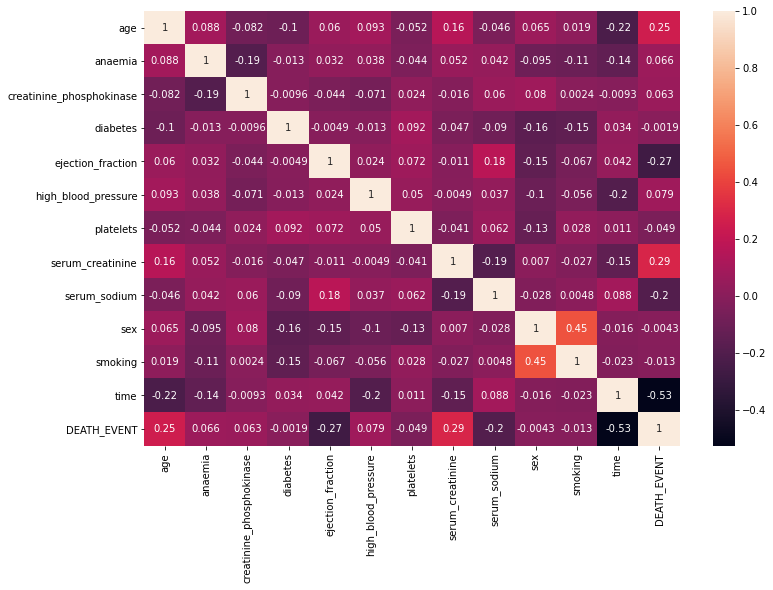

In [12]:
fig = plt.gcf()
fig.set_size_inches(12, 8)
sns.heatmap(df_normalized.corr(), annot=True)
plt.show()

In [26]:
# Feature selection and train/test split
X = df_normalized[['age','anaemia', 'creatinine_phosphokinase', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'smoking']]
y = df_normalized[['DEATH_EVENT']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 5)
print('Train set: ', X_train.shape, y_train.shape)
print('Test set: ', X_test.shape, y_test.shape)

Train set:  (239, 9) (239, 1)
Test set:  (60, 9) (60, 1)


In [27]:
# Modeling using Decision Trees

# Finding the best max depth
for i in range(4, 10):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    tree.fit(X_train, y_train)
    yhat = tree.predict(X_test)
    print('depth {} , accuracy {}'.format (i, metrics.accuracy_score(y_test, yhat)))



depth 4 , accuracy 0.7833333333333333
depth 5 , accuracy 0.7833333333333333
depth 6 , accuracy 0.7
depth 7 , accuracy 0.7166666666666667
depth 8 , accuracy 0.6333333333333333
depth 9 , accuracy 0.7


In [28]:
# The best was 4 with accuracy of 78%
tree = DecisionTreeClassifier(criterion='entropy', max_depth=6)
yhat = myModel.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)